In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

#선형 회귀(실습) Linear Regression
- 공부시간에 따른 시험 점수

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [ ]:
# values
X = dataset.iloc[:,:-1].values
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

In [ ]:
y = dataset.iloc[:,-1].values
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100])

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # 학습 (모델 생성)

# X는 2차원 배열 형태로 들어가야 하는 듯!⭐

LinearRegression()

In [ ]:
y_pred = reg.predict(X) # X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

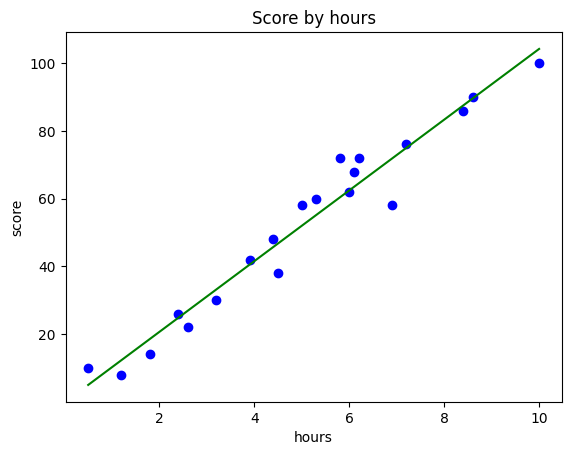

In [ ]:
# 시각화하기
plt.scatter(X, y, color='blue')
plt.plot(X,y_pred, color='green')
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
# X는 2차원 배열 형태로 들어가줘야함!!⭐⭐⭐⭐
print("9시간 공부했을 때 예상 점수 : " , reg.predict([[9]]))

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [ ]:
print("시간 공부했을 때 예상 점수 : " , reg.predict([[9], [8], [7]]))

시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [ ]:
reg.coef_ # 직선의 기울기

array([10.44369694])

In [ ]:
reg.intercept_ # 직선의 y절편

-0.218484702867201

# 데이터 분리(train,test set)
## 9시간 공부했을 때 예상 점수가 맞는지는 어떻게 확인하지?

In [ ]:
X = dataset.iloc[:,:-1].values
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

In [ ]:
y = dataset.iloc[:,-1].values
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## 분리된 데이터로 모델링 다시해보자

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

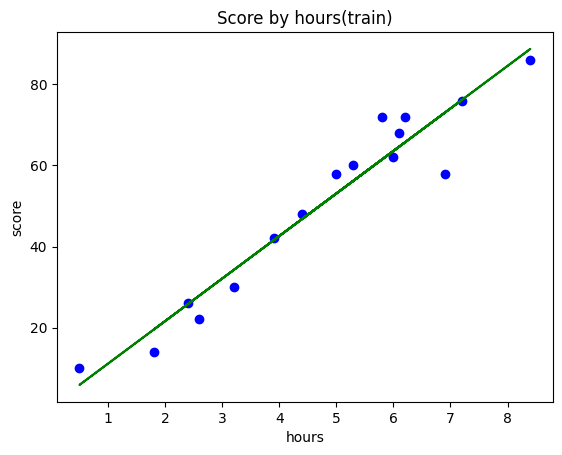

In [ ]:
# 훈련세트로 시각화
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train,reg.predict(X_train), color='green')
plt.title("Score by hours(train)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

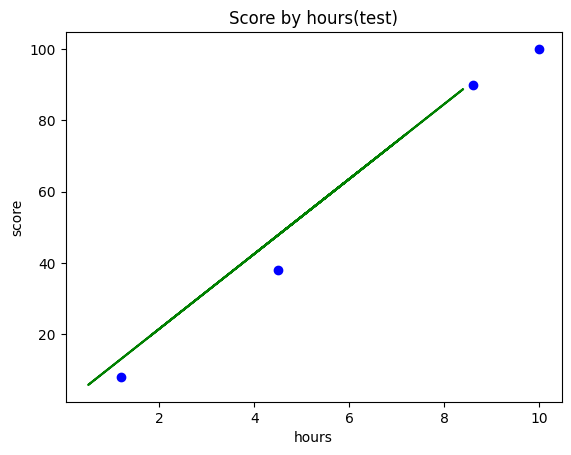

In [ ]:
# 테스트세트로 시각화
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train,reg.predict(X_train), color='green') # 이부분은 건드리면 안됨. 모델이 뽑은 회귀식임
plt.title("Score by hours(test)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
reg.coef_

array([10.49161294])

In [ ]:
reg.intercept_

0.6115562905169369

# 모델 평가
- 육안으로 보지 말고 평가하자!

In [ ]:
# 테스트 세트를 통한 모델 평가
reg.score(X_test, y_test)

0.9727616474310156

In [ ]:
# 훈련 세트를 통한 모델 평가
reg.score(X_train, y_train)

0.9356663661221668

# 경사 하강법 Gradient Descent
- 최소제곱법(잔차제곱합 최소로 해주는 방식)은 노이즈에 취약하다! 값이 갑자기 커진다.
- 또한 독립변수 X개수가 많아지면 비용이커지고 복잡해진다

In [ ]:
from sklearn.linear_model import SGDRegressor # stocastic Regressor 빼먹지 말기!
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

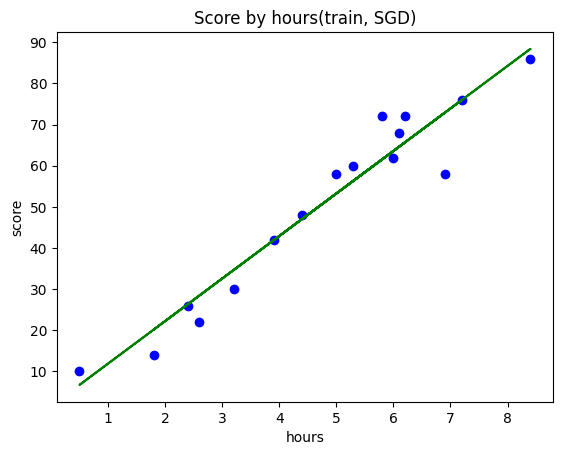

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train,sr.predict(X_train), color='green')
plt.title("Score by hours(train, SGD)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

(array([10.34217521]), array([1.53268588]))

In [ ]:
# test set으로 모델 평가
sr.score(X_test, y_test)

0.9715781208543884

In [ ]:
# 에폭도 넣어보자
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1) # 에폭반복할 때 loss가 어떻게 줄어드는지 보여줌

# max_iter = ephoc 에폭개념 훈련세트반복 횟수
# eta0 = learningrate 학습률 개념


sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

SGDRegressor(eta0=0.001, random_state=0, verbose=1)

### max_iter랑 eta0 조절해가면서 최적화시키면됨!


# 다중 선형회귀 Multiple LinearRegression
- 시험성적이 공부시간에만 영향받는거 아니다!

- 원핫 인코딩도 할거

In [ ]:
dataset = pd.read_csv('/content/MultipleLinearRegressionData.csv')
dataset.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [ ]:
# 주피터 환경에서는 read_excel(하고 skiprows, nrows 이용)
X = dataset.iloc[:,:-1].values
X

array([[0.5, 3, 'Home'],
       [1.2, 4, 'Library'],
       [1.8, 2, 'Cafe'],
       [2.4, 0, 'Cafe'],
       [2.6, 2, 'Home'],
       [3.2, 0, 'Home'],
       [3.9, 0, 'Library'],
       [4.4, 0, 'Library'],
       [4.5, 5, 'Home'],
       [5.0, 1, 'Cafe'],
       [5.3, 2, 'Cafe'],
       [5.8, 0, 'Cafe'],
       [6.0, 3, 'Library'],
       [6.1, 1, 'Cafe'],
       [6.2, 1, 'Library'],
       [6.9, 4, 'Home'],
       [7.2, 2, 'Cafe'],
       [8.4, 1, 'Home'],
       [8.6, 1, 'Library'],
       [10.0, 0, 'Library']], dtype=object)

In [ ]:
y = dataset.iloc[:,-1].values
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2],)], remainder='passthrough')
# drop='first'는 3줄안쓰고 2줄쓰겠다는거, 10,01,00만으로도 셋이 구분가능
# [2번째 컬럼에 적용할거고] remainder 나머지는 그냥 냅둘거

X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.5, 3],
       [0.0, 1.0, 1.2, 4],
       [0.0, 0.0, 1.8, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 3.9, 0],
       [0.0, 1.0, 4.4, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 5.0, 1],
       [0.0, 0.0, 5.3, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 1.0, 6.0, 3],
       [0.0, 0.0, 6.1, 1],
       [0.0, 1.0, 6.2, 1],
       [1.0, 0.0, 6.9, 4],
       [0.0, 0.0, 7.2, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 8.6, 1],
       [0.0, 1.0, 10.0, 0]], dtype=object)

# 결과보면 맨앞에 2줄 추가됐다.
10 home
01 library
00 cafe

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204])

In [ ]:
# test 세트로 예측한 값이었다.
# 실제값은 y_test
y_test

array([ 90,   8, 100,  38])

In [ ]:
reg.coef_, reg.intercept_

(array([-5.82712824, -1.04450647, 10.40419528, -1.64200104]),
 5.365006706544776)

In [ ]:
# 모델 평가
reg.score(X_train, y_train)

0.9623352565265527

In [ ]:
reg.score(X_test, y_test)
# 보통 train이 높고 test가 좀 낮은게 좋은 모델이긴함
# 그냥 score찍은거 r2_score계수였음!

0.9859956178877446

# 회귀 모델 평가 지표
- MAE
- MSE
- RMSE
- R2(결정계수) 0~1 1에가까울수록 good

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X_test)
mean_absolute_error(y_test, y_pred) # 실제값, 예측값

3.2253285188287997

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) # 실제값, 예측값

19.900226981514916

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False) # 실제값, 예측값

4.460967045553566

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9859956178877446

# 다항 회귀 Polynomial Regression
- 생활속에선 직선 하나로 표현하기 어려운 경우가 많음

In [ ]:
dataset = pd.read_csv('/content/PolynomialRegressionData.csv')
dataset
# 우등생 느낌 좀만 공부해도 점수 팍팍오름
# 이건 직선으로 표현하긴 무리가 있음. 좀 굽어진 곡선이 더 잘맞음

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6
5,2.4,14
6,2.5,10
7,2.6,12
8,2.9,24
9,3.1,26


In [ ]:
# X는 2차원 배열로 가져와야 해서
X = dataset.iloc[:, :-1].values
X

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2],
       [2.4],
       [2.5],
       [2.6],
       [2.9],
       [3.1],
       [3.2],
       [3.3],
       [3.7],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.4],
       [4.7],
       [4.8]])

In [ ]:
y = dataset.iloc[:,-1].values
y

array([  2,   4,   6,   4,   6,  14,  10,  12,  24,  26,  32,  46,  44,
        52,  58,  54,  68,  80,  84, 100])

In [ ]:
# 데이터 수가 적어서 데이터 분리는 안하고 그냥 진행할 것
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# 그냥 선형회귀 해보자
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
y_pred = reg.predict(X)
y_pred

array([-14.17377245,  -8.50256206,  -2.83135167,  -0.94094821,
         4.73026218,  27.41510373,  29.30550719,  31.19591065,
        36.86712104,  40.64792796,  42.53833143,  44.42873489,
        51.99034874,  55.77115566,  57.66155913,  59.55196259,
        61.44236605,  65.22317298,  70.89438336,  72.78478683])

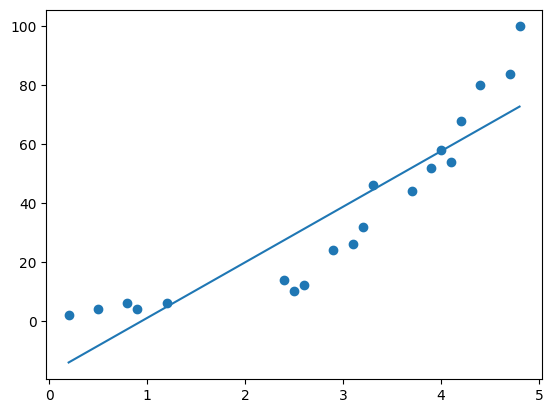

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
X_poly[:5]
# x의0승, x x의2승 까지나옴!

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [ ]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_poly)

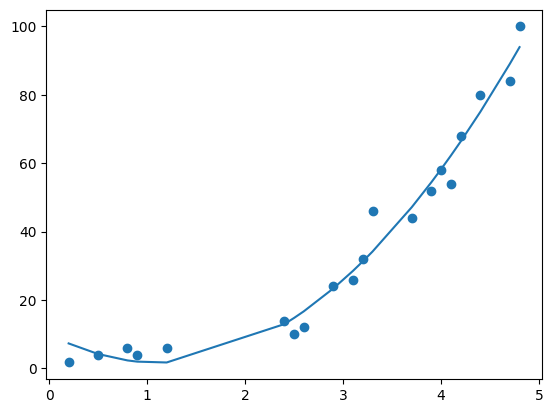

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

In [ ]:
# 2시간 공부했을 때 점수 예측해보자(선형회귀일때)
reg.predict([[2]])

array([19.85348988])

In [ ]:
# 다항회귀일때
lin_reg.predict(poly_reg.fit_transform([[2]])) # 이렇게 변환해서 넣어줘야함

array([7.05092142])

# 로지스틱회귀

In [107]:
dataset = pd.read_csv('/content/LogisticRegressionData.csv')
dataset

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0
5,3.2,0
6,3.9,0
7,4.4,1
8,4.5,0
9,5.0,1


# 참고

In [88]:
for i in range(len(dataset)):
  if dataset.iloc[i,1] == 0:
    dataset.iloc[i,1]= '불합격'
  else:
    dataset.iloc[i,1] = '합격'

In [89]:
dataset

,hour,pass
0,0.5,불합격
1,1.2,불합격
2,1.8,불합격
3,2.4,불합격
4,2.6,불합격
5,3.2,불합격
6,3.9,불합격
7,4.4,합격
8,4.5,불합격
9,5.0,합격


In [99]:
y = dataset.iloc[:,-1:].values
y.shape

(20, 1)

In [104]:
# 만약 원핫 인코딩이 안되어있다면?
# LabelEncoder도 가능
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(y)
y

<20x2 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [105]:
print(y)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0


In [106]:
y.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# 다시 본론

In [109]:
X = dataset.iloc[:,:-1].values
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

In [110]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [139]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [140]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [114]:
# 6시간 공부했을 때 예측
classifier.predict([[6]])

array([1])

In [115]:
classifier.predict_proba([[6]])

array([[0.14150735, 0.85849265]])

In [116]:
# test세트로 예측
classifier.predict(X_test)

array([1, 0, 1, 1])

In [117]:
# 실제값은 이거였음
y_test

array([1, 0, 1, 0])

In [119]:
classifier.score(X_test,y_test) # 4개중 3개맞음

0.75

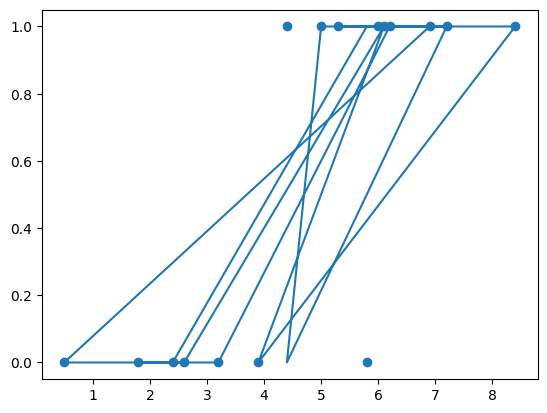

In [120]:
# train set 시각화 ⭐주의! 로지스틱 식 내가 직접 써줘야함
plt.scatter(X_train, y_train)
plt.plot(X_train, -------------classifier.predict(X_train)---------------) # 이거는 0,1만나옴!주의
plt.show()

In [141]:
# 시그모이드함수
import numpy as np
p = 1 / (1 + np.exp(-(classifier.coef_ * X_train + classifier.intercept_)))

p.shape

(16, 1)

In [142]:
X_train.shape

(16, 1)

In [143]:
p = p.reshape(-1)
X_train = X_train.reshape(-1)

In [145]:
p.shape

(16,)

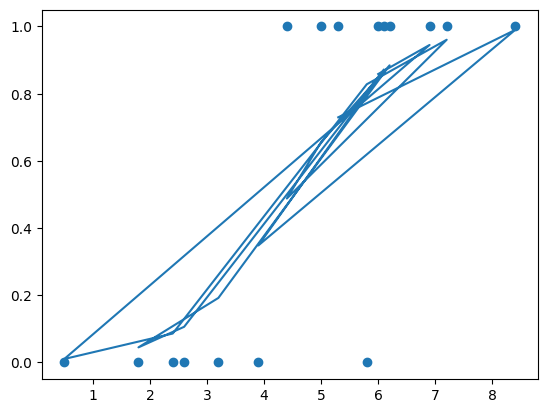

In [146]:
# 데이터가 너무 적어서 그런듯?
plt.scatter(X_train, y_train)
plt.plot(X_train, p)
plt.show()

In [148]:
# 데이터가 적어서 함수가 뾰족해지는 문제
# np.arange의 도움을 받자
import numpy as np
X_range = np.arange(min(X), max(X), 0.1)
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))

p.shape

(1, 95)

In [149]:
X_range.shape

(95,)

In [150]:
p = p.reshape(-1)
p.shape

(95,)

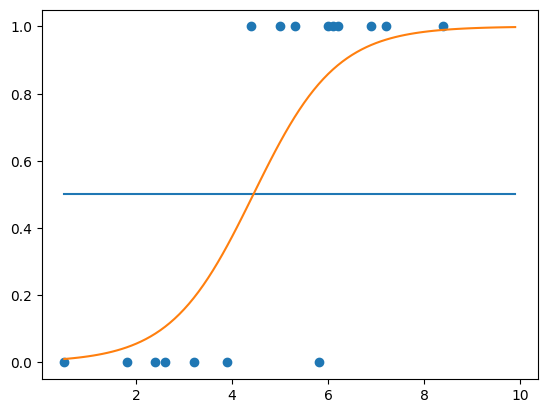

In [151]:
# (1,95)말고 (95,)로 맞춰줘야 잘나옴
plt.scatter(X_train, y_train)

plt.plot(X_range, np.full(len(X_range),0.5)) # X_range의 개수만큼 0.5로 채워라

plt.plot(X_range, p)
plt.show()

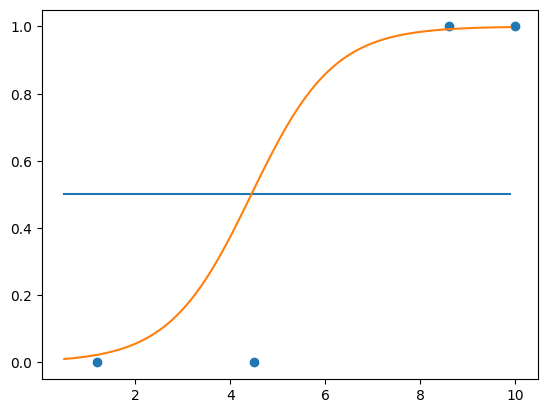

In [152]:
# test set 시각화
plt.scatter(X_test, y_test)
plt.plot(X_range, np.full(len(X_range),0.5)) # X_range의 개수만큼 0.5로 채워라
plt.plot(X_range, p)
plt.show()

### 위에서 4.5 예측은 1이었는데 실제는 0이었다

In [153]:
classifier.predict([[4.5]])

array([1])

In [154]:
classifier.predict_proba([[4.5]]) # 약 51%의 확률로 합격 그래프보면 51퍼정도인거 알수있다!

array([[0.48310686, 0.51689314]])

# 혼동 행렬
confusion matrix

In [156]:
# metrics 평가지표 모아놓은듯
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [157]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]])

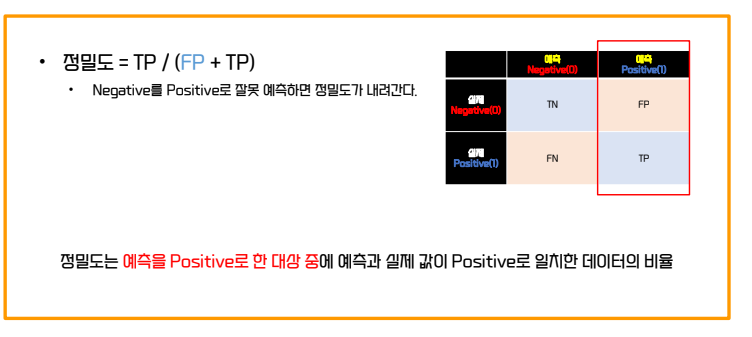

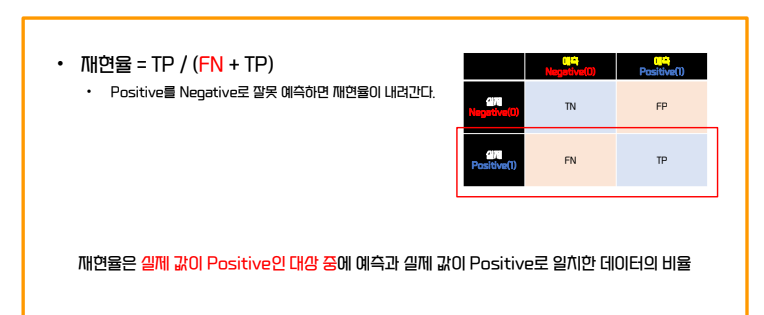